# Supervised Model Data Modelling Study 
## Submitted as requirement for final project for the course :  Introduction to Machine Learning - Supervised Learning for MSCS - CU Boulder

# Project Topic

--Gives a clear explanation of what the project is about and clearly states both the type of learning/algorithms and type of task

Step 1: 

The project is to find out the best type of learning algorithm to predict student grades from the dataset available at UCI ML data repository at https://archive.ics.uci.edu/

Link to Dataset: https://archive.ics.uci.edu/dataset/320/student+performance .

Education is an important field for social development which also co-incidentally applies well to data mining and learning scenarios because fo the amount of data collected in an organized manner which lead to quantifiable results ( attendance , number of subjects, students scores etc . ) .Modeling student performance is an important tool for both educators and
students, since it can help a better understanding of this phenomenon and ultimately improve it. For instance,school professionals could perform corrective measures for weak students (e.g. remedial classes).

## Type of Learning algorithm : 
Step 2 : 
The original research paper associated with this dataset provided analysis http://repositorium.sdum.uminho.pt/bitstream/1822/8024/1/student.pdf with the following data models (Decision Trees (DT), Random Forests (RF),Neural Networks (NN) and Support Vector Machines (SVM), were tested) . Per the paper the tree based models achieved the best performance 
For data split 

A - with all variables from Table 1 except G3 (the output);

B - similar to A but without G2 (the second period grade); 

C - similar to B but without G1 (the first period grade).

Since we already have these models studied in the paper , the purpose of the current submission below is to evaluate the models we learned in the course , by focusing on parameter selection and to see if we can obtain better performance or if the performance is worse to quantify the reasons .  We will be doing the comparison for for the dataset mentioned above as A ( all variables , with the exception of the output G3 )
The final target G3 can be evaluated in 3 methods :

1) Actual value of grades. Range :  1 to 20;

2) Using a 5-level classification based on the Erasmus1 grade conversion system;
grades between 0-9 = 1 ; grades between 10-11 = 2 ; grades between 12-13 = 3 ;grades between 14-15 = 4 ; grades between 16-20 = 5

3) Using a binary Pass/Fail :  0-9 => Fail => 0 ; 10-20 => Pass => 1

For the purpose of this excercise , we will be using the regression method to evaluate grades for their actual value ( 1~20) range.
-----------------------------------------------------------------------------------------------------------------------------------
Model 1: Linear Regression and
Model 2: KNN models for this Mathematics dataset 


NN : Neural Network ;NV : Naive Predictor; SVM : Support Vector Machine; DT : Decision Tree ; RF : Random Forest 
### Regression results (RMSE values) ( From the research paper Table 5:## )
Mathematics 

|       |  NV        | NN         | SVM        | DT         | RF          |
|-------|------------|------------|------------|------------|-------------|
| **A** | 2.01±0.00  | 2.05±0.02  | 2.09±0.02  | 1.94±0.04  | 1.75†±0.01  |
| **B** | 2.80±0.00  | 2.82±0.02  | 2.90±0.02  | 2.67±0.04  | 2.46†±0.01  |
| **C** | 4.59±0.00  | 4.41±0.03  | 4.37±0.03  | 4.46±0.04  | 3.90†±0.01  |

Model 3: Logistic Regression 
Model 4: For binary Pass/Fail data : Combine PCA and Calculate Logistic regression and measure PCC  and compare against the paper's data for the same . 

### Binary classification results (PCC values, in %)
Input Mathematics 
|Setup 	|NV 			|NN 		|SVM 		|DT 		|RF 
|-------|-------		|-------	|------- 	|-------	|-------
|A 		|91.9† ±0.0 	|88.3±0.7 	|86.3±0.6 	|90.7±0.3 	|91.2±0.2
|B 		|83.8†±0.0 		|81.3±0.5 	|80.5±0.5 	|83.1±0.5 	|83.0±0.4
|C 		|67.1±0.0 		|66.3±1.0 	|70.6∗±0.4 	|65.3±0.8 	|70.5±0.5 



Note : The prediction target in the form of grades is numeric, and the available parameters also arrange themselves to be numeric , barring a few categorical ones. 

## Type of Task :
Clean the dataset 
Adapt the categorical values to number . 
Do feature selection, drop correlated features. 
Find the best combination of parameters and associated weights that can predict student performance given by final_grade : G3 (  Regression modelling ) 




In [10]:
#import dataset from UCI ML 
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
k =student_performance.data.original
#Print List of columns as a list  
print(" Columns : ", k.columns.tolist())
num_rows = k.shape[0]
num_columns = k.shape[1]

print(f"The student performance has {num_rows} rows and {num_columns} columns and has " + ("some" if k.isnull().sum().sum() else "no")  + " missing values." )

# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


 Columns :  ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
The student performance has 649 rows and 33 columns and has no missing values.
{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': No

In [ ]:
!pip install statsmodels

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr




## Exploratory Data Analysis

In [13]:
k.describe()
k.head(5)
# metadata 


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Description of all the columns 

| Attribute     | Description (Domain)
|---------------|-----------------------------------------------------------------------------------------------------------------------|
| sex 			|       student’s sex (binary: female or male)                                                                          |
|               |                                                                                                                       |
| age 			|       student’s age (numeric: from 15 to 22)                                                                          |
|               |                                                                                                                       |
| school 		|       student’s school (binary: Gabriel Pereira or Mousinho da Silveira)                                              |
|               |                                                                                                                       |
| address 		|       student’s home address type (binary: urban or rural)                                                            |
|               |                                                                                                                       |
| Pstatus 		|       parent’s cohabitation status (binary: living together or apart)                                                 |
|               |                                                                                                                       |
| Medu 			|       mother’s education (numeric: from 0 to 4a)                                                                      |
|               |                                                                                                                       |
| Mjob 			|       mother’s job (nominalb)                                                                                         |
|               |                                                                                                                       |
| Fedu 			|       father’s education (numeric: from 0 to 4a)                                                                      |
|               |                                                                                                                       |
| Fjob 			|       father’s job (nominalb)                                                                                         |
|               |                                                                                                                       |
| guardian 		|       student’s guardian (nominal: mother, father or other)                                                           |
|               |                                                                                                                       |
| famsize 		|       family size (binary: ≤ 3 or > 3)                                                                                |
|               |                                                                                                                       |
| famrel 		|       quality of family relationships (numeric: from 1 – very bad to 5 – excellent)                                   |
|               |                                                                                                                       |
| reason 		|       reason to choose this school (nominal: close to home, school reputation, course preference or other)            |
|               |                                                                                                                       |
| traveltime 	|       home to school travel time (numeric: 1 – < 15 min., 2 – 15 to 30 min., 3 – 30 min. to 1 hour or 4 – > 1 hour).  |
|               |                                                                                                                       |
| studytime 	|       weekly study time (numeric: 1 – < 2 hours, 2 – 2 to 5 hours, 3 – 5 to 10 hours or 4 – > 10 hours)               |
|               |                                                                                                                       |
| failures 		|       number of past class failures (numeric: n if 1 ≤ n < 3, else 4)                                                 |
|               |                                                                                                                       |
| schoolsup 	|       extra educational school support (binary: yes or no)                                                            |
|               |                                                                                                                       |
| famsup 		|       family educational support (binary: yes or no)                                                                  |
|               |                                                                                                                       |
| activities 	|       extra-curricular activities (binary: yes or no)                                                                 |
|               |                                                                                                                       |
| paidclass 	|       extra paid classes (binary: yes or no)                                                                          |
|               |                                                                                                                       |
| internet 		|       Internet access at home (binary: yes or no)                                                                     |
|				|                                                                                                                       |
| nursery 		|		attended nursery school (binary: yes or no)                                                                     |
|               |	                                                                                                                    |
| higher 		|			wants to take higher education (binary: yes or no)                                                          |
|               |	                                                                                                                    |
| romantic 		|		with a romantic relationship (binary: yes or no)                                                                |
|               |	                                                                                                                    |
| freetime 		|		free time after school (numeric: from 1 – very low to 5 – very high)                                            |
|               |	                                                                                                                    |
| goout 		|			going out with friends (numeric: from 1 – very low to 5 – very high)                                        |
|               |	                                                                                                                    |
| Walc 			|		weekend alcohol consumption (numeric: from 1 – very low to 5 – very high)                                       |
|               |	                                                                                                                    |
| Dalc 			|		workday alcohol consumption (numeric: from 1 – very low to 5 – very high)                                       |
|               |	                                                                                                                    |
| health 		|			current health status (numeric: from 1 – very bad to 5 – very good)                                         |
|               |	                                                                                                                    |
| absences 		|		number of school absences (numeric: from 0 to 93)                                                               |
|               |	                                                                                                                    |
| G1 			|			first period grade (numeric: from 0 to 20)                                                                  |
|               |	                                                                                                                    |
| G2 			|			second period grade (numeric: from 0 to 20)                                                                 |
|               |	                                                                                                                    |
| G3 			|			final grade (numeric: from 0 to 20)																			|



In [36]:
#we have the following categorical fields that we need to conver to an integer format or decide to drop them .


# Find the min, max and mode for target G3 :

print(f" Final Grade G3 Min: {k['G3'].min()} Max: {k['G3'].max()}  Mode : {k['G3'].mode()}")
#Final Grade G3 Min: 0 Max: 19  Mode : 0    11


# For all categorical fields that are not yes/ no .. print out unique values and finalize mapping . 

print(f"address = {k['address'].unique()}")
#address = ['U' 'R']   => Urban / Rural => we can translate these to binary 0/1  Urban =>0 , Rural => 1 
print(f"famsize = {k['famsize'].unique()}")
#famsize = ['GT3' 'LE3']  => Greate than 3 / Lesser than 3 => we can translate these to binary  GT3 => 0 , LT3 => 1
print(f"Pstatus = {k['Pstatus'].unique()}")
#Pstatus = ['A' 'T']   parent’s cohabitation status (binary: living together or apart)  => A => 0 , T=> 1 
print(f"Mjob = {k['Mjob'].unique()}")
#Mjob = ['at_home' 'health' 'other' 'services' 'teacher']   map to ['at_home':'1',  'health' : '2' , 'teacher':'3',  'services' : '4', 'other' : '5' ]
print(f"Fjob = {k['Fjob'].unique()}")
#Fjob = ['teacher' 'other' 'services' 'health' 'at_home']  map to ['at_home':'1',  'health' : '2' , 'teacher':'3',  'services' : '4', 'other' : '5' ]
print(f"reason = {k['reason'].unique()}")
#reason = ['course' 'other' 'home' 'reputation'] => Reason to choose this school. map to  map to ['course':'1',  'home' : '2' , 'reputation':'3',  'other' : '4' ]
print(f"guardian = {k['guardian'].unique()}")
#guardian = ['mother' 'father' 'other']  => map to ['mother':'1',  'father' : '2' ,  'other' : '3' ]
print(f"school = {k['school'].unique()}")
#Unique values in 'school': ['GP' 'MS']  => map to  {'GP':'0',  'MS' : '1' }
print(f"sex = {k['sex'].unique()}")
#'sex': ['F' 'M']  => map to ['mother':'1',  {'M':'0',  'F' : '1' } ]





 Final Grade G3 Min: 0 Max: 19  Mode : 0    11
Name: G3, dtype: int64
address = ['U' 'R']
famsize = ['GT3' 'LE3']
Pstatus = ['A' 'T']
Mjob = ['at_home' 'health' 'other' 'services' 'teacher']
Fjob = ['teacher' 'other' 'services' 'health' 'at_home']
reason = ['course' 'other' 'home' 'reputation']
guardian = ['mother' 'father' 'other']
school = ['GP' 'MS']
sex = ['F' 'M']


In [30]:
df=k.copy()
# Dictionary for replacement



print(f"address = {df['address'].unique()}")
#address = ['U' 'R']   => Urban / Rural => we can translate these to binary 0/1  Urban =>0 , Rural => 1
replace_dict = {'U': '0', 'R': '1'}
df['address'] = df['address'].replace(replace_dict)
print(f"address = {df['address'].unique()}")
###
print(f"famsize = {df['famsize'].unique()}")
#famsize = ['GT3' 'LE3']  => Greate than 3 / Lesser than 3 => we can translate these to binary  GT3 => 0 , LT3 => 1
replace_dict = {'GT3': '0', 'LE3': '1'}
df['famsize'] = df['famsize'].replace(replace_dict)
print(f"famsize = {df['famsize'].unique()}")
##
print(f"Pstatus = {df['Pstatus'].unique()}")
#Pstatus = ['A' 'T']   parent’s cohabitation status (binary: living together or apart)  => A => 0 , T=> 1 
replace_dict = {'A': '0', 'T': '1'}
df['Pstatus'] = df['Pstatus'].replace(replace_dict)
print(f"Pstatus = {df['Pstatus'].unique()}")
##
print(f"Mjob = {k['Mjob'].unique()}")
#Mjob = ['at_home' 'health' 'other' 'services' 'teacher']   map to ['at_home':'1',  'health' : '2' , 'teacher':'3',  'services' : '4', 'other' : '5' ]
replace_dict = {'at_home':'1',  'health' : '2' , 'teacher':'3',  'services' : '4', 'other' : '5' }
df['Mjob'] = df['Mjob'].replace(replace_dict)
print(f"Mjob = {df['Mjob'].unique()}")
##
print(f"Fjob = {k['Fjob'].unique()}")
#Fjob = ['teacher' 'other' 'services' 'health' 'at_home']  map to ['at_home':'1',  'health' : '2' , 'teacher':'3',  'services' : '4', 'other' : '5' ]
replace_dict = {'at_home':'1',  'health' : '2' , 'teacher':'3',  'services' : '4', 'other' : '5' }
df['Fjob'] = df['Fjob'].replace(replace_dict)
print(f"Fjob = {df['Fjob'].unique()}")
##
print(f"reason = {k['reason'].unique()}")
#reason = ['course' 'other' 'home' 'reputation'] => Reason to choose this school. map to  map to ['course':'1',  'home' : '2' , 'reputation':'3',  'other' : '4' ]
replace_dict = {'course':'1',  'home' : '2' , 'reputation':'3',  'other' : '4' }
df['reason'] = df['reason'].replace(replace_dict)
print(f"reason = {df['reason'].unique()}")
##
print(f"guardian = {k['guardian'].unique()}")
#guardian = ['mother' 'father' 'other']  => map to ['mother':'1',  'father' : '2' ,  'other' : '3' ]
replace_dict = {'mother':'1',  'father' : '2' ,  'other' : '3'}
df['guardian'] = df['guardian'].replace(replace_dict)
print(f"guardian = {df['guardian'].unique()}")
##
print(f"school = {k['school'].unique()}")
#Unique values in 'school': ['GP' 'MS']  => map to  {'GP':'0',  'MS' : '1' }
replace_dict = {'GP':'0',  'MS' : '1' }
df['school'] = df['school'].replace(replace_dict)
print(f"school = {df['school'].unique()}")
##
print(f"sex = {k['sex'].unique()}")
#'sex': ['F' 'M']  => map to ['mother':'1',  {'M':'0',  'F' : '1' } ]
replace_dict = {'M':'0',  'F' : '1' }
df['sex'] = df['sex'].replace(replace_dict)
print(f"sex = {df['sex'].unique()}")
##
## Replace all other yes/ no with their binary equivalents.
cleanup_nums = {"yes": 1, "no": 0}
df.replace(cleanup_nums, inplace=True)

address = ['U' 'R']
address = ['0' '1']
famsize = ['GT3' 'LE3']
famsize = ['0' '1']
Pstatus = ['A' 'T']
Pstatus = ['0' '1']
Mjob = ['at_home' 'health' 'other' 'services' 'teacher']
Mjob = ['1' '2' '5' '4' '3']
Fjob = ['teacher' 'other' 'services' 'health' 'at_home']
Fjob = ['3' '5' '4' '2' '1']
reason = ['course' 'other' 'home' 'reputation']
reason = ['1' '4' '2' '3']
guardian = ['mother' 'father' 'other']
guardian = ['1' '2' '3']
school = ['GP' 'MS']
school = ['0' '1']
sex = ['F' 'M']
sex = ['1' '0']


C:\Users\Navaz Husain\AppData\Local\Temp\ipykernel_10596\2394718988.py:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(cleanup_nums, inplace=True)


In [31]:
# cehck unique values in all columsn to see that they are either set to binary or to integers
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'school': ['0' '1']
Unique values in 'sex': ['1' '0']
Unique values in 'age': [18 17 15 16 19 22 20 21]
Unique values in 'address': ['0' '1']
Unique values in 'famsize': ['0' '1']
Unique values in 'Pstatus': ['0' '1']
Unique values in 'Medu': [4 1 3 2 0]
Unique values in 'Fedu': [4 1 2 3 0]
Unique values in 'Mjob': ['1' '2' '5' '4' '3']
Unique values in 'Fjob': ['3' '5' '4' '2' '1']
Unique values in 'reason': ['1' '4' '2' '3']
Unique values in 'guardian': ['1' '2' '3']
Unique values in 'traveltime': [2 1 3 4]
Unique values in 'studytime': [2 3 1 4]
Unique values in 'failures': [0 3 1 2]
Unique values in 'schoolsup': [1 0]
Unique values in 'famsup': [0 1]
Unique values in 'paid': [0 1]
Unique values in 'activities': [0 1]
Unique values in 'nursery': [1 0]
Unique values in 'higher': [1 0]
Unique values in 'internet': [0 1]
Unique values in 'romantic': [0 1]
Unique values in 'famrel': [4 5 3 1 2]
Unique values in 'freetime': [3 2 4 1 5]
Unique values in 'goout': [4 3 2 1 

In [34]:
print(df.dtypes)
# Convert all columns to integer type
df = df.astype(int)
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures     

In [37]:

#Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

#Statistical summary of numerical features
print("\nStatistical summary:")
print(df.describe())



Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Statistical summary:
           school         sex         age     address     famsize     Pstatus  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     0.348228    0.590139   16.744222    0.303544    0.295840    0.876733   
std      0.476776    0.492187    1.218138    0.460143    0.456771    0.328996   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   


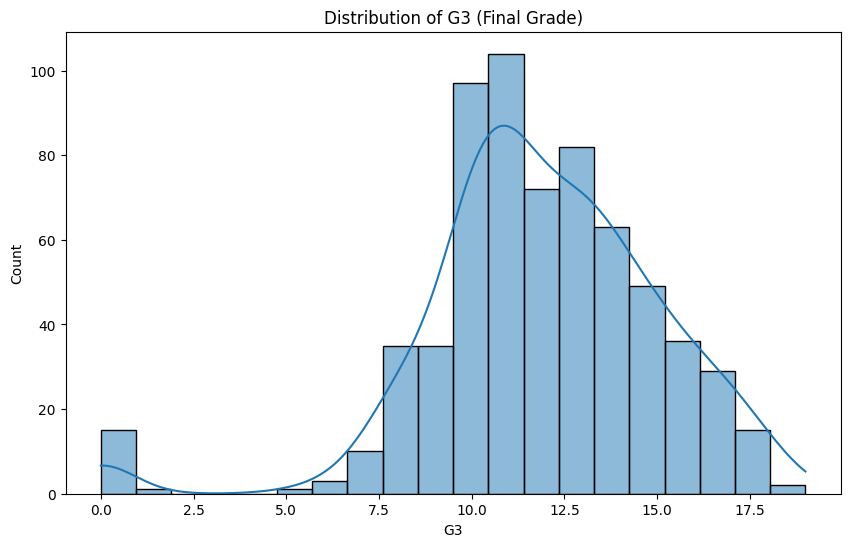

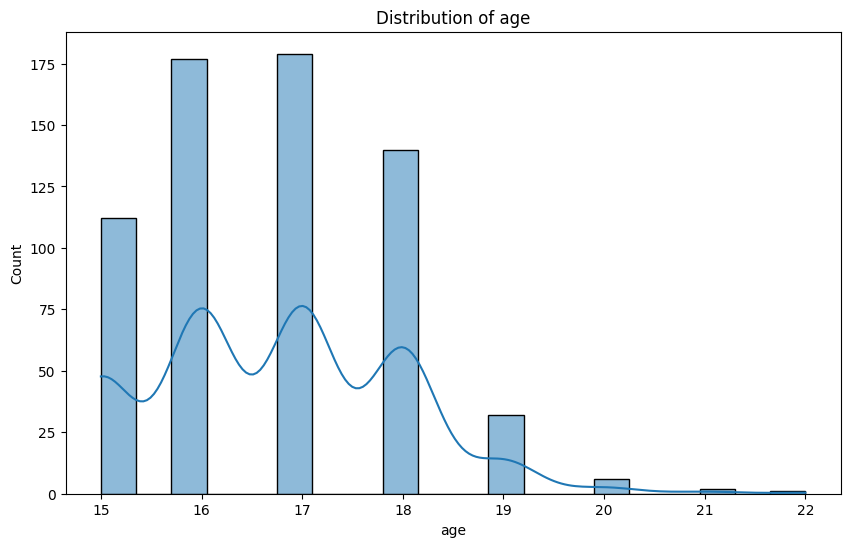

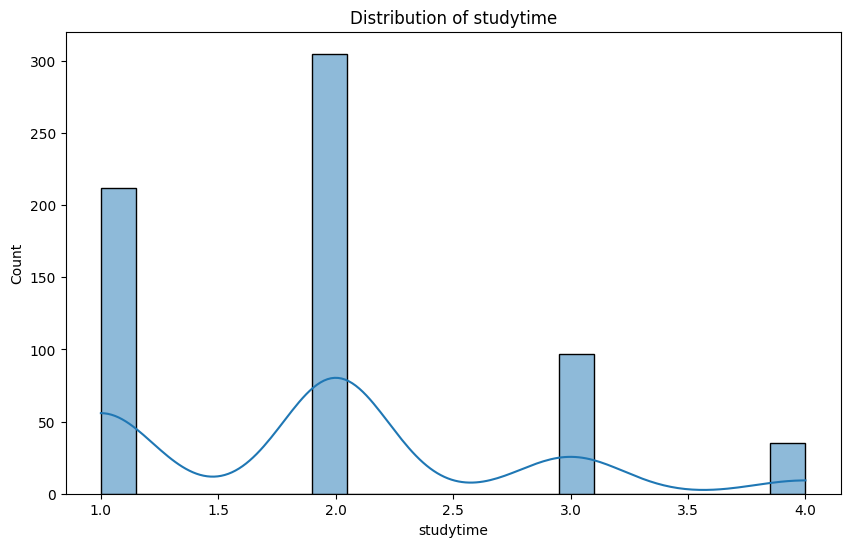

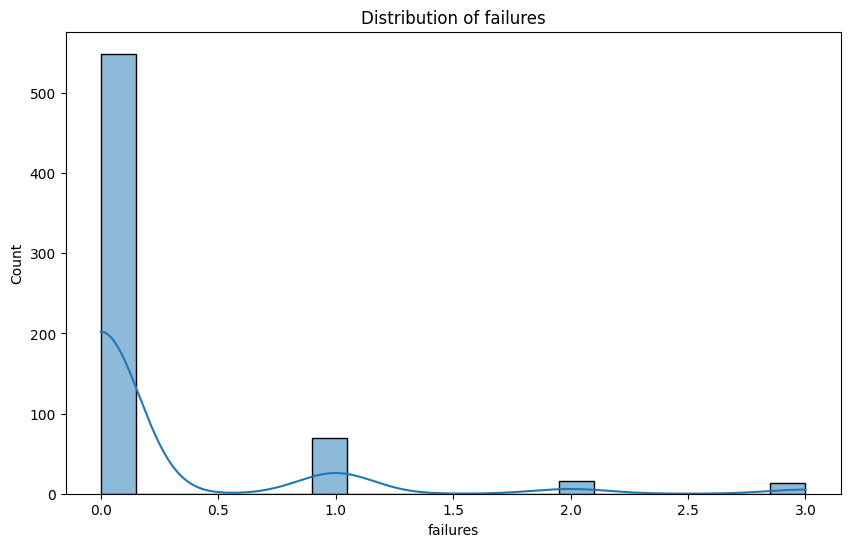

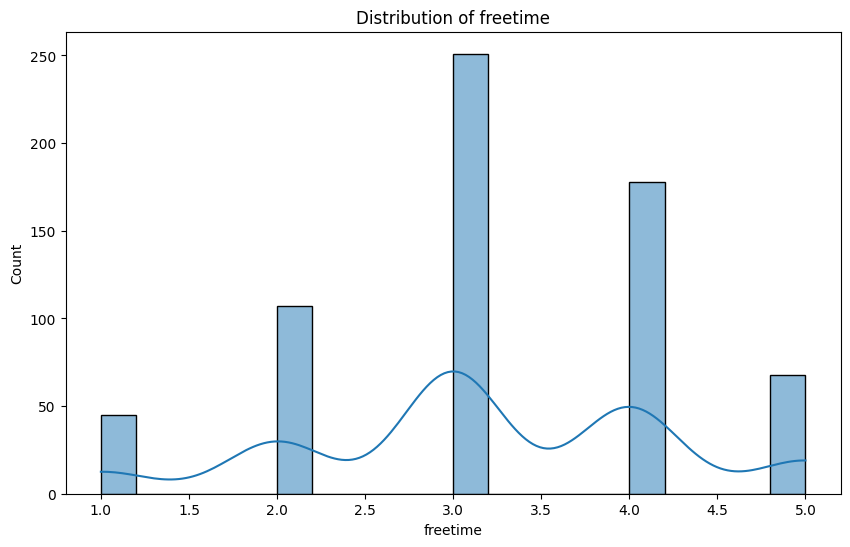

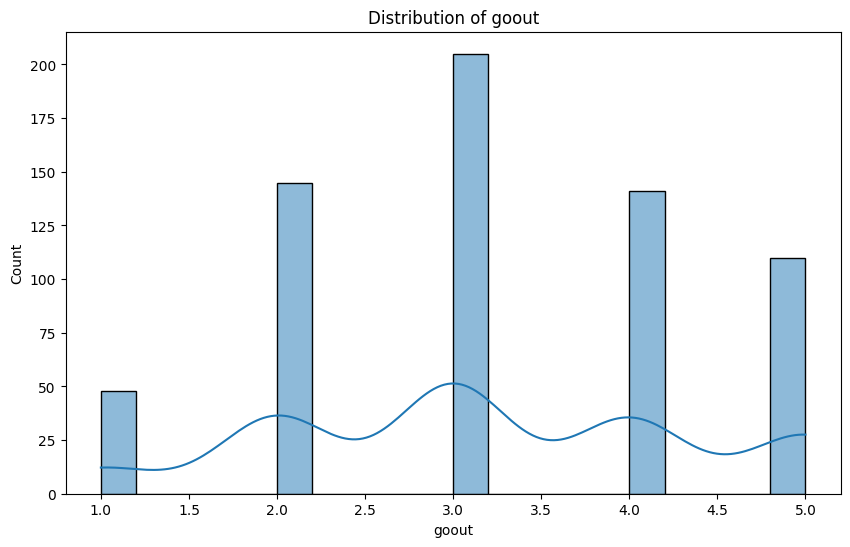

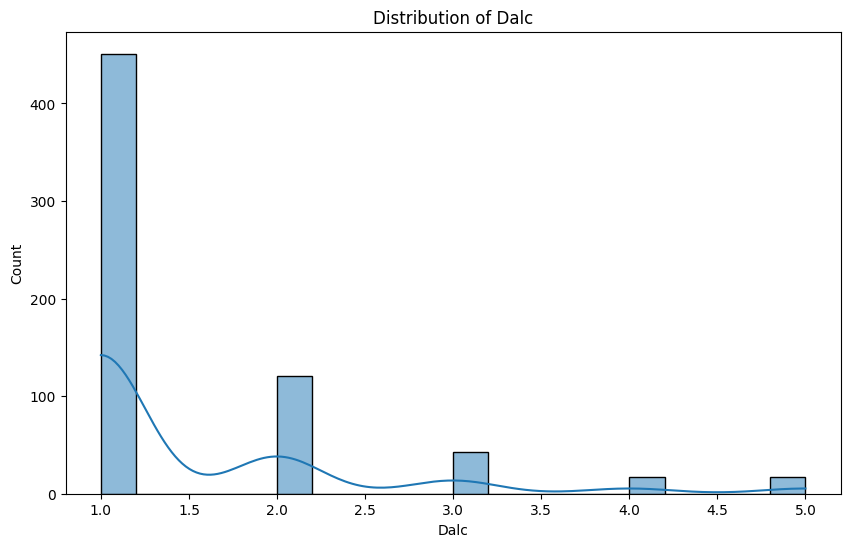

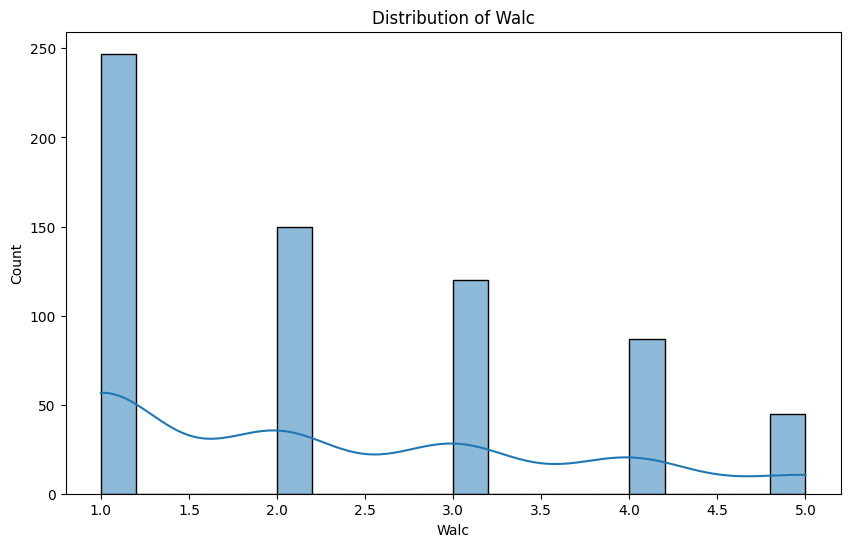

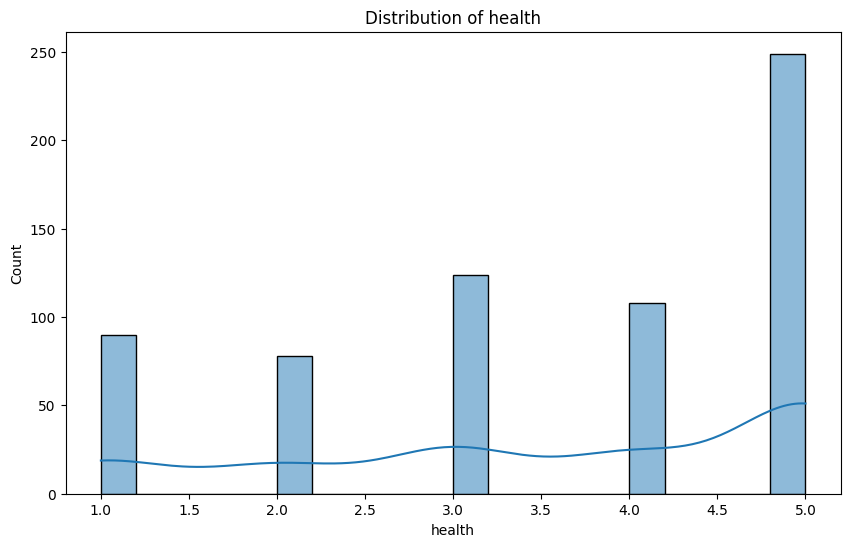

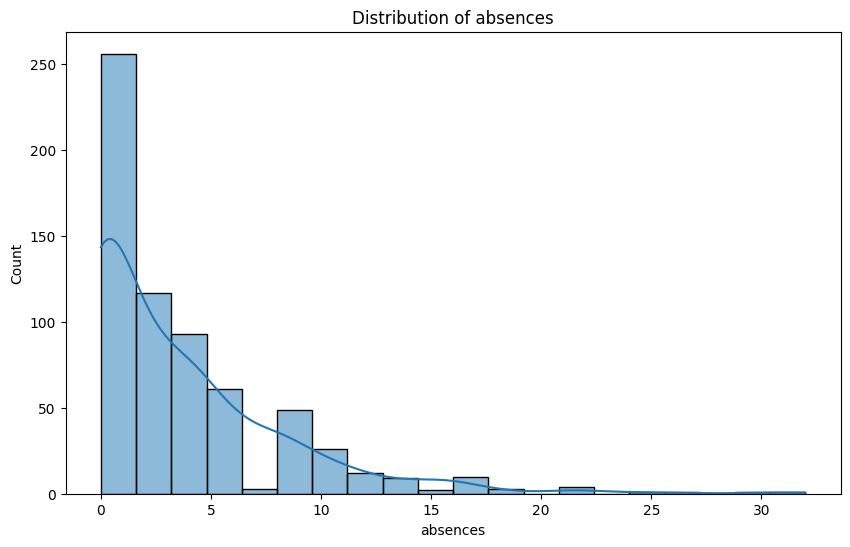

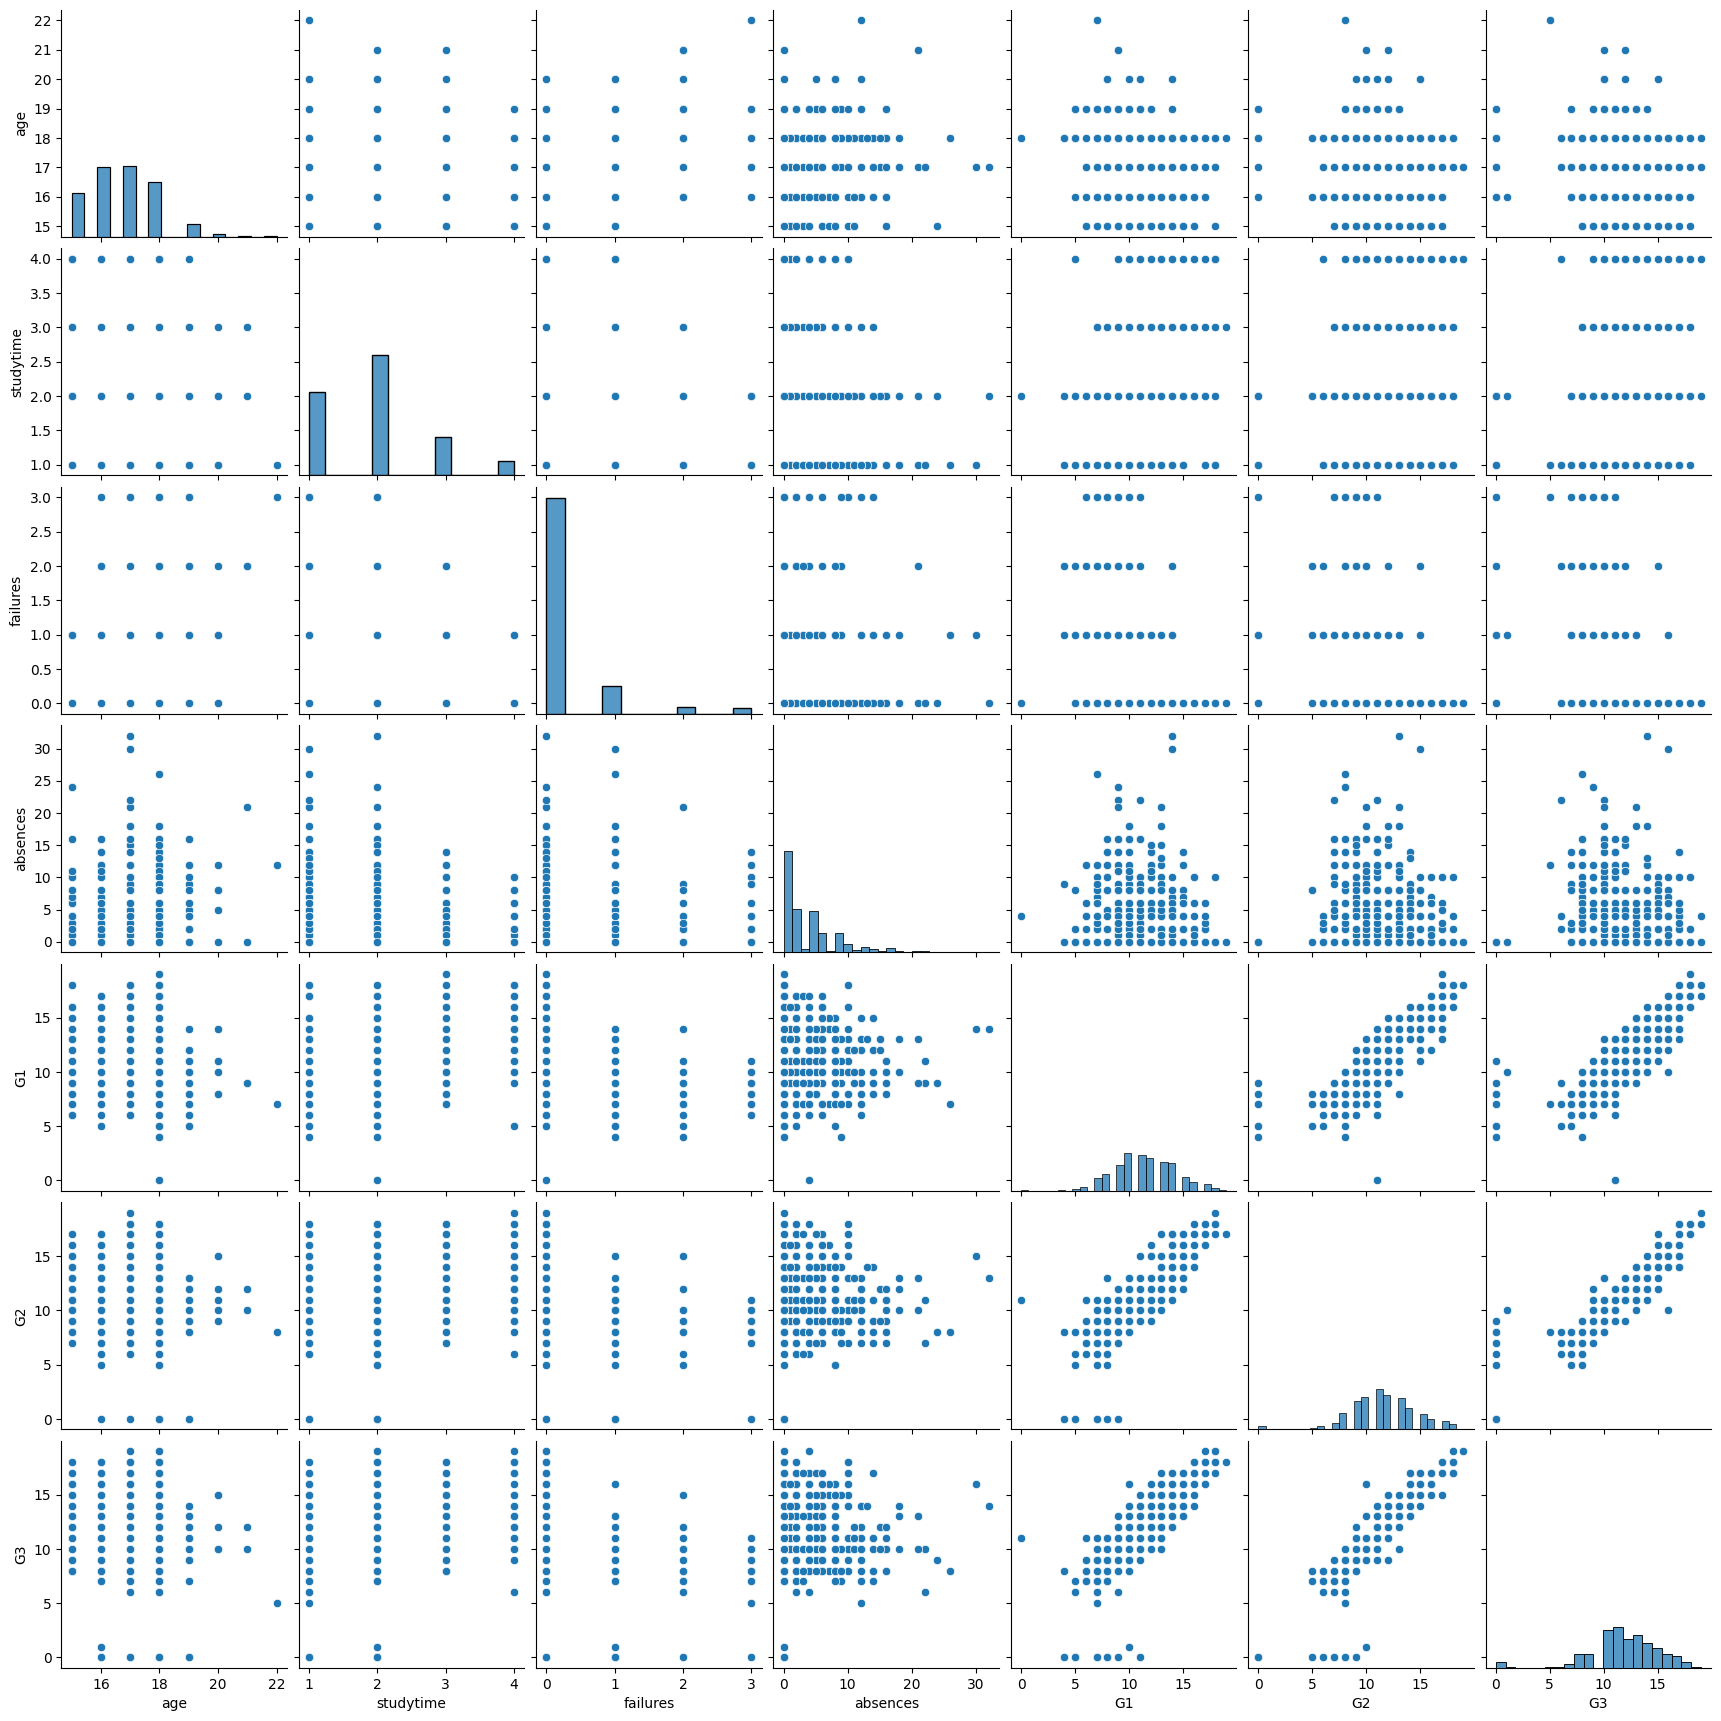

In [43]:

# Distribution of the target variable 'G3'
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of G3 (Final Grade)')
plt.show()

# 5. Distribution of other key features
columns_to_plot = ['age', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 6. Pairplot for some key features vs. G3
sns.pairplot(df[['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']])
plt.show()


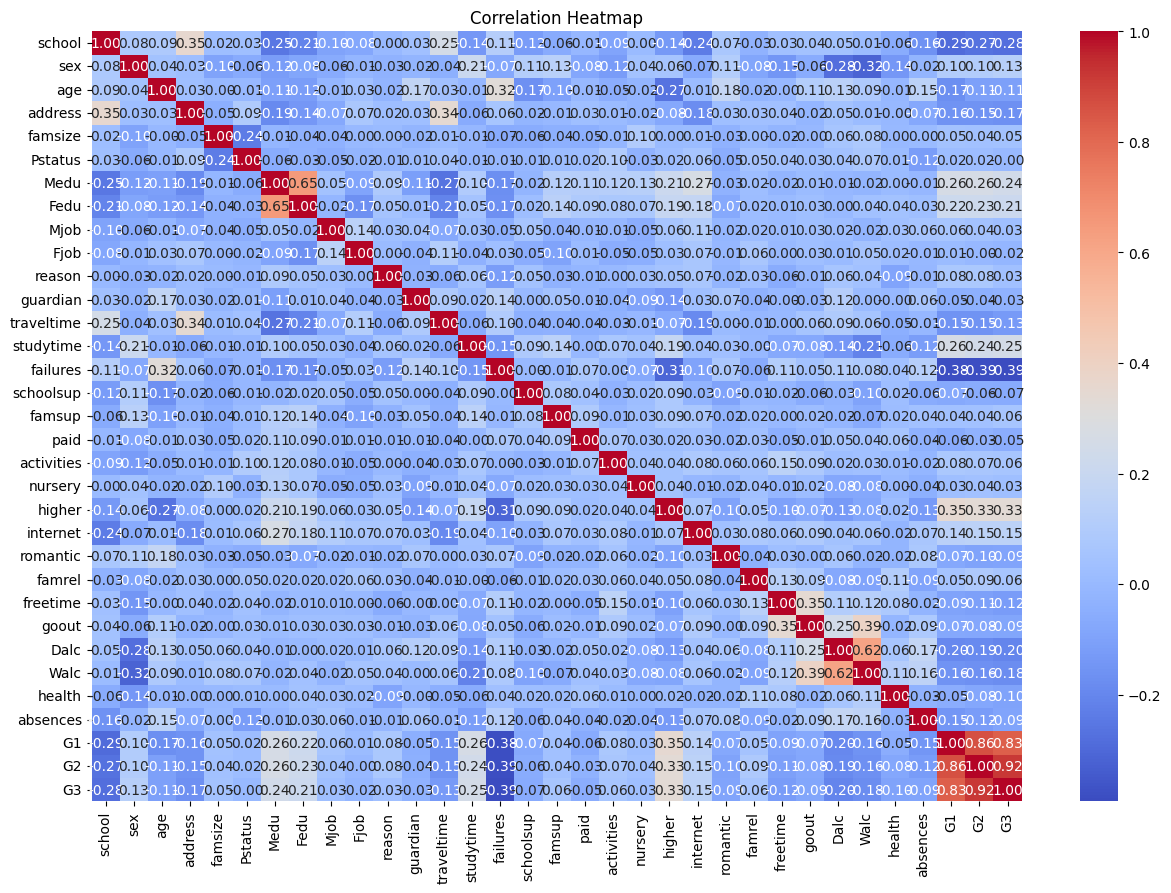

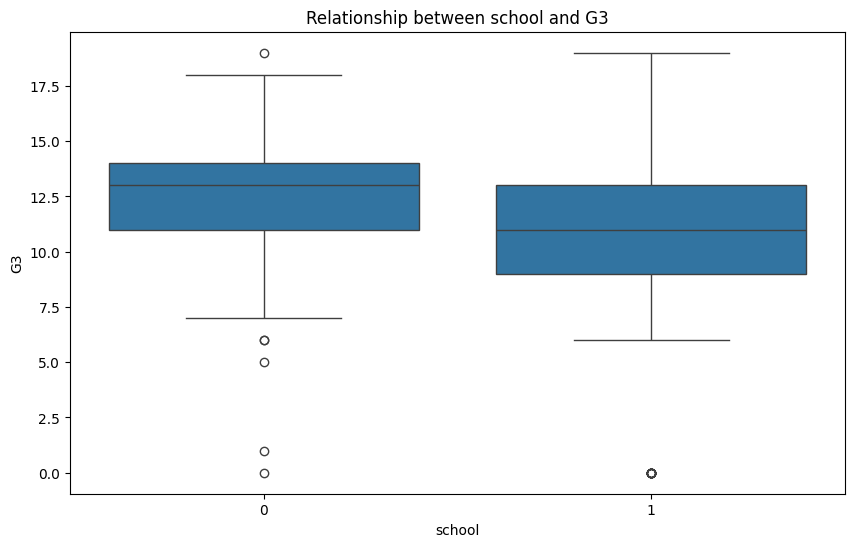

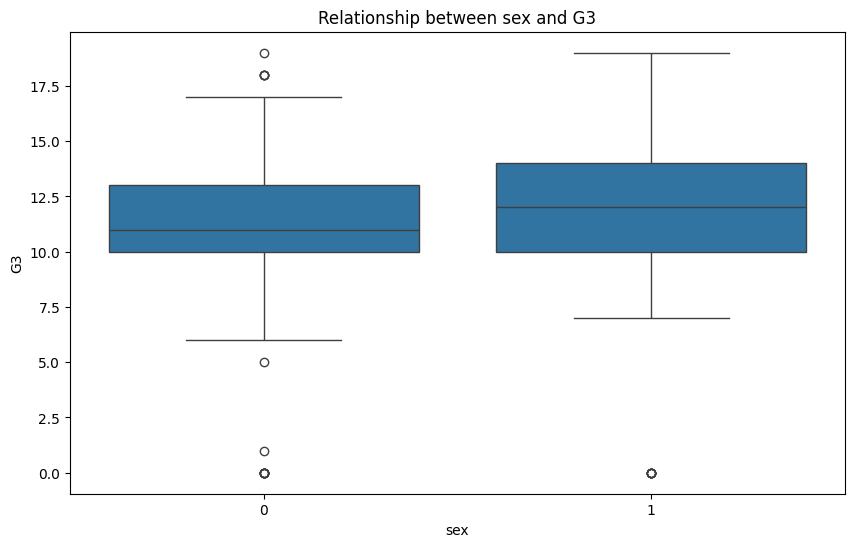

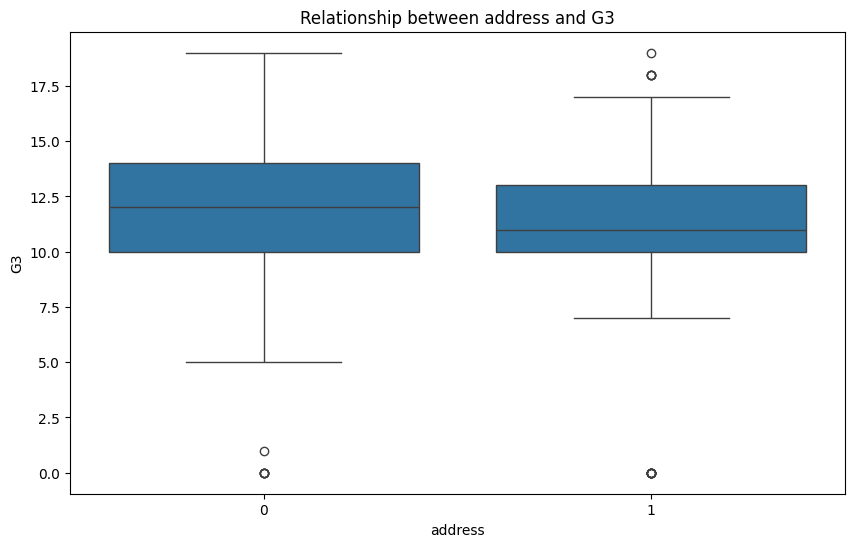

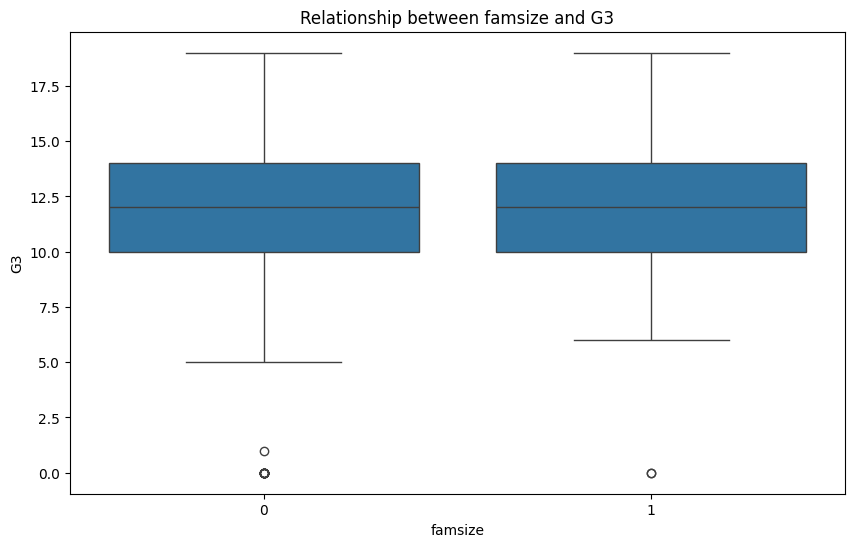

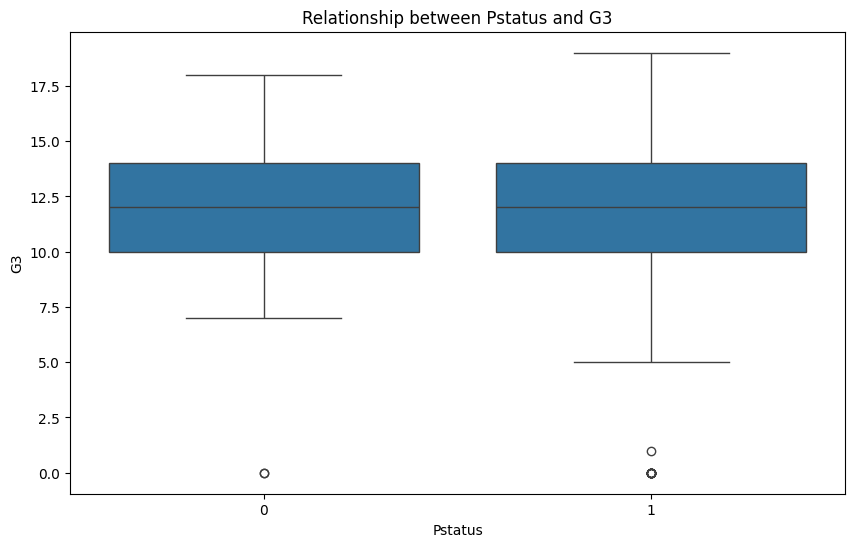

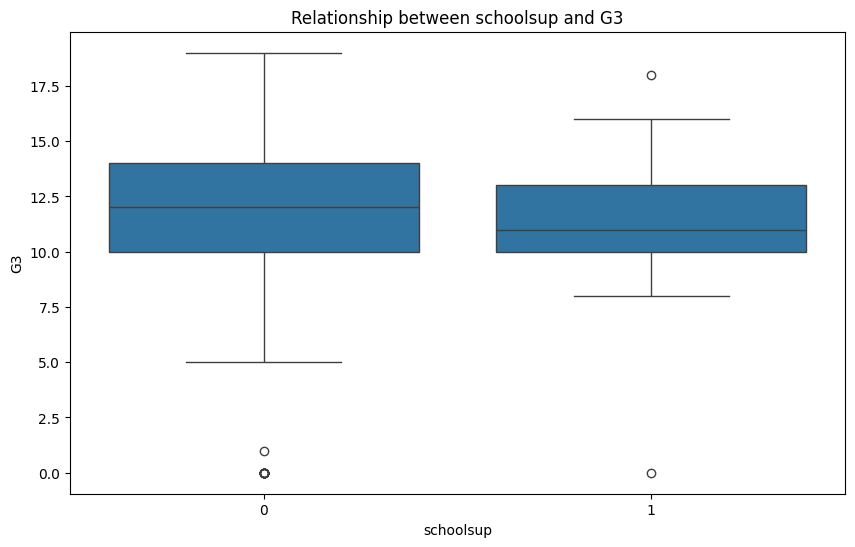

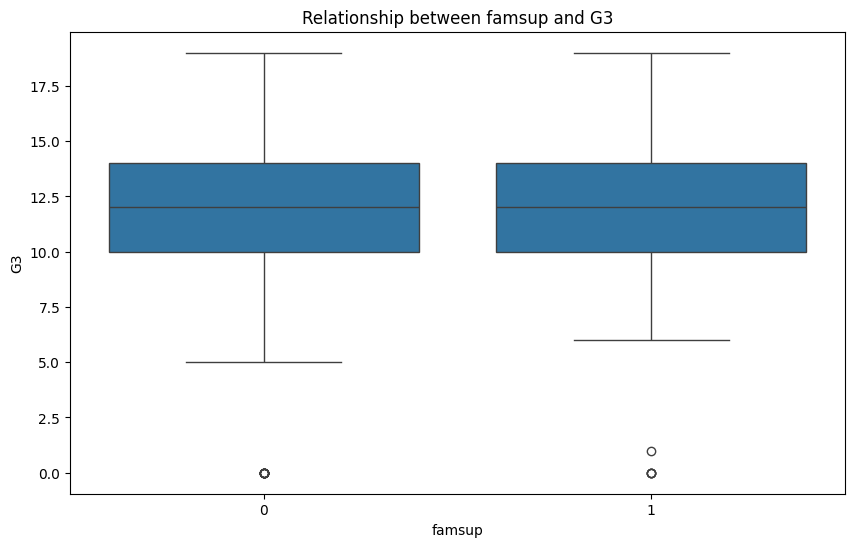

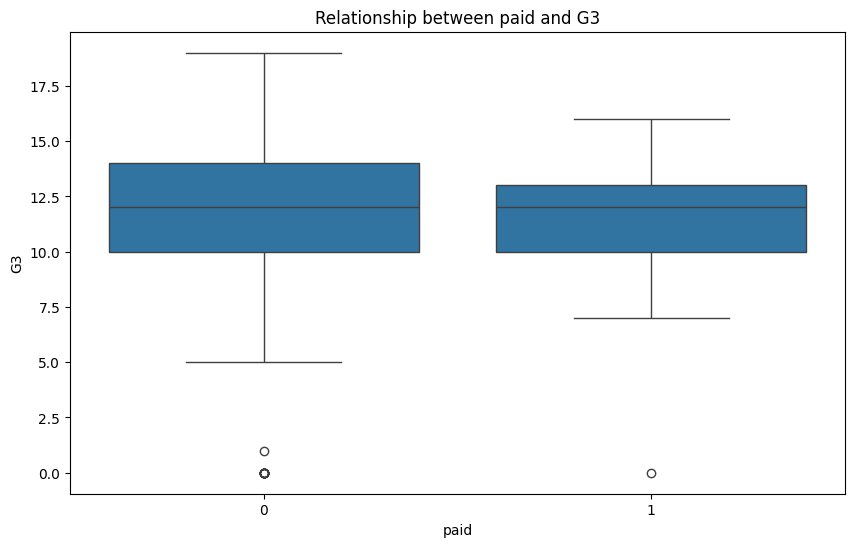

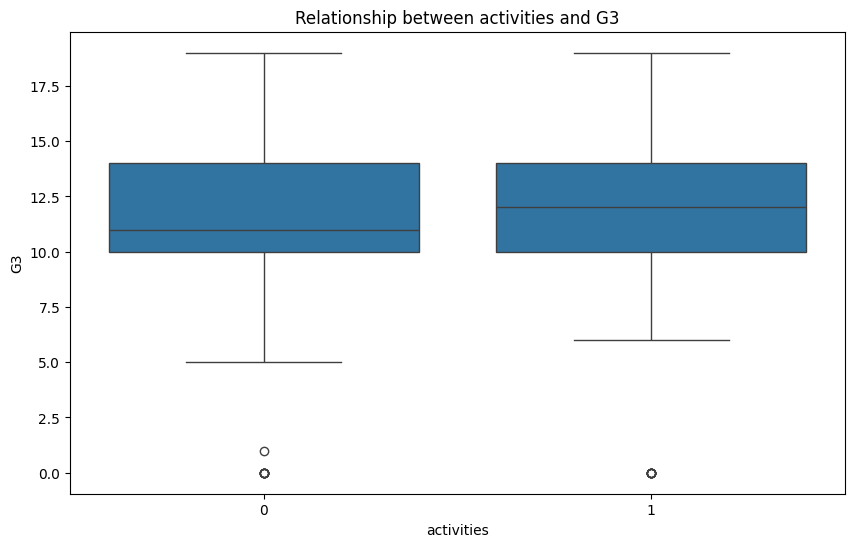

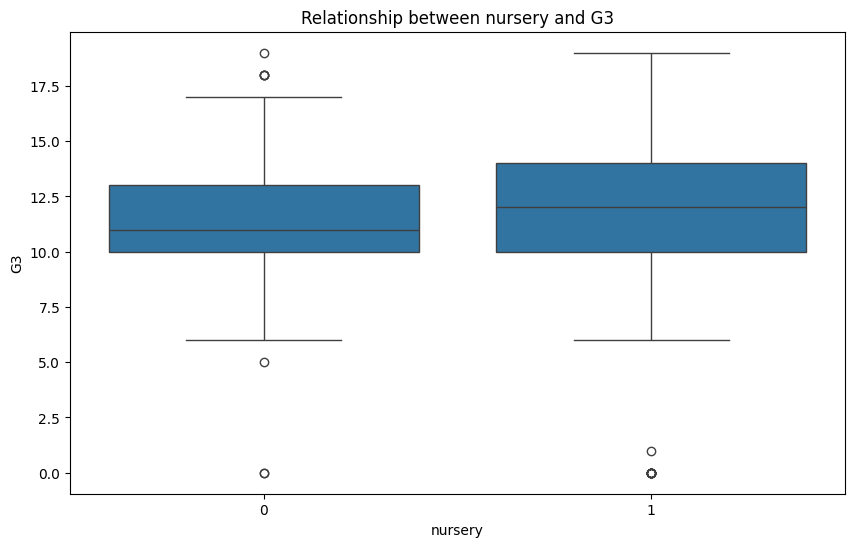

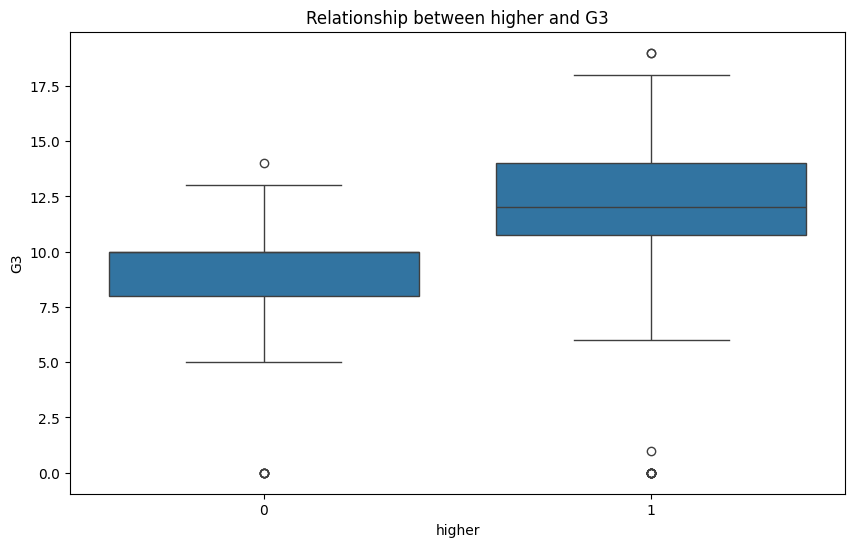

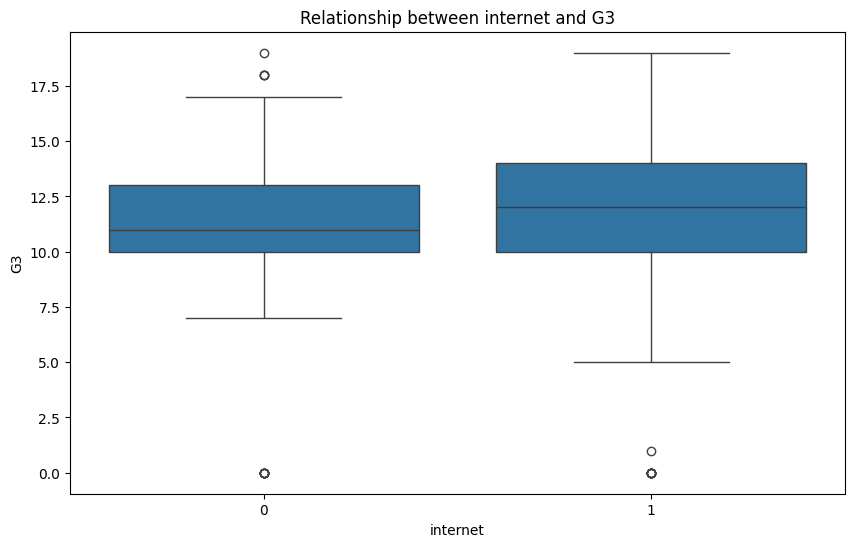

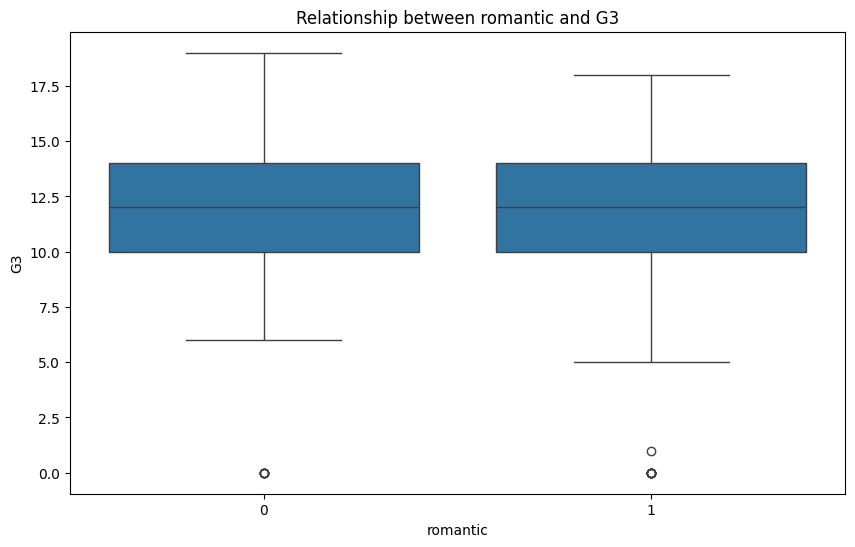

In [45]:

#  Correlation matrix and heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Checking relationships between some categorical features and G3
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='G3', data=df)
    plt.title(f'Relationship between {col} and G3')
    plt.show()



In [55]:

# List of integer features in the dataset
int_features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
                'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Function to detect outliers using the IQR method 
# Interquartile Range (IQR) to identify and flag outliers. Outliers are typically defined as values that fall below
#  Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively.
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for each integer feature
outliers_dict = {}
for col in int_features:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        outliers_dict[col] = outliers
    #print(f"Outliers in {col}:")
    #print(outliers[[col]], "\n")

for i in outliers_dict:
    print(outliers_dict[i])


     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
279       0    0   22        0        0        1     3     1     4     4  ...   

     famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
279       5         4      5     5     5       1        12   7   8   5  

[1 rows x 33 columns]
     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    1   18        0        0        0     4     4     1     3  ...   
7         0    1   17        0        0        0     4     4     5     3  ...   
8         0    0   15        0        1        0     3     2     4     5  ...   
14        0    0   15        0        0        0     2     2     5     5  ...   
28        0    0   16        0        1        0     3     4     4     5  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
607       1    1   17        1        1        0     2     1     4     5  ...   
608       1    1   1

### Data Exploration conclusions : 

Overall , no features were defined as outliers ,  The features brought out by inter quartile comparison are all either binary or derived from categories . 
From the summary distribution , there is no need for any frequency determination or histogram plots. we can conclude that the data is as clean and prepared as it likely can be. 


G1 and G2 are the most highly correlated from the matrix plot . This would make sense as previous scores are the best indicators of future performance . The paper also specifies the same . 

We will use G1 and G2 as part of our prediction parameters .  

          G1        G2        G3
G1  1.000000  0.864982  0.826387
G2  0.864982  1.000000  0.918548
G3  0.826387  0.918548  1.000000


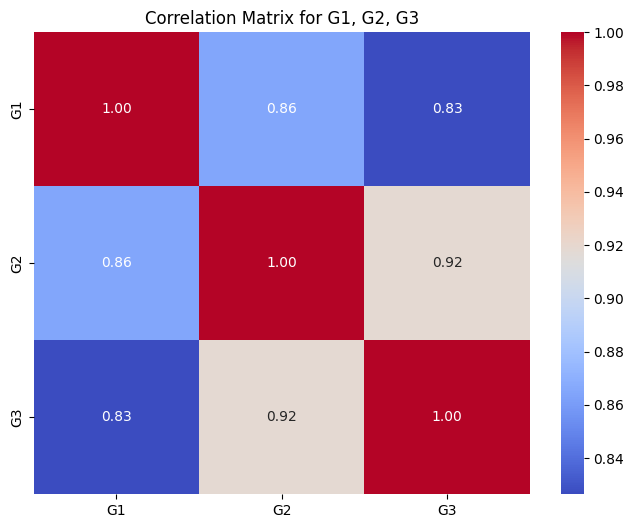

  Feature        VIF
0   const  18.840406
1      G1   3.971299
2      G2   3.971299


In [61]:

# Correlation matrix for G1, G2, G3
corr_matrix = df[['G1', 'G2', 'G3']].corr()

# Display correlation matrix
print(corr_matrix)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for G1, G2, G3')
plt.show()

# Calculate VIF for G1, G2, and G3 (target excluded)
X = df[['G1', 'G2']]

# 2. Add a constant (intercept term)
X = add_constant(X)

# 3. Calculate VIF for G1 and G2
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)

NN : Neural Network ;NV : Naive Predictor; SVM : Support Vector Machine; DT : Decision Tree ; RF : Random Forest 
### Regression results (RMSE values) ( From the research paper Table 5:## )
Mathematics 

|       |  NV        | NN         | SVM        | DT         | RF          |
|-------|------------|------------|------------|------------|-------------|
| **A** | 2.01±0.00  | 2.05±0.02  | 2.09±0.02  | 1.94±0.04  | 1.75†±0.01  |
| **B** | 2.80±0.00  | 2.82±0.02  | 2.90±0.02  | 2.67±0.04  | 2.46†±0.01  |
| **C** | 4.59±0.00  | 4.41±0.03  | 4.37±0.03  | 4.46±0.04  | 3.90†±0.01  |





In [89]:
# The calculated values for VIF is below 5 , so, these are not multi collinear .i 
# Modelling 
#1) Linear Regression and
#2) KNN models for this Mathematics dataset 
#3) Logistic Regression
# A model not taught in class : 
#4) Combine an unsupervised approach like PCA for dimensionality reduction on top of manual feature pruning, then running logistic regression again to see if we can improve prediction accuracy . 




# Split the dataset into 80% training and 20% testing
# Split into features (X) and target (y)
X = df.drop('G3', axis=1)  # All columns except 'G3'
y = df['G3']               # 'G3' column as target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

### Model 1. Linear Regression Model ###

#To apply hyperparameter tuning in Linear Regression, particularly for regularized versions like Ridge Regression (L2 regularization) 
# we can use techniques like Grid Search or Randomized Search to find the optimal value of the regularization strength (alpha).
# Here we will be doing Grid search alone.
# Set up the parameter grid for Ridge Regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Initialize Ridge Regression model
ridge = Ridge()

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding RMSE
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha for Ridge Regression: {best_alpha}")

# Predict using the best model
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Calculate RMSE for the best Ridge Regression model
rmse_linear =root_mean_squared_error(y_test, y_pred_ridge)
print(f"RMSE for Ridge Regression with best alpha: {rmse_linear}")






Best alpha for Ridge Regression: 100.0
RMSE for Ridge Regression with best alpha: 1.265717461325014


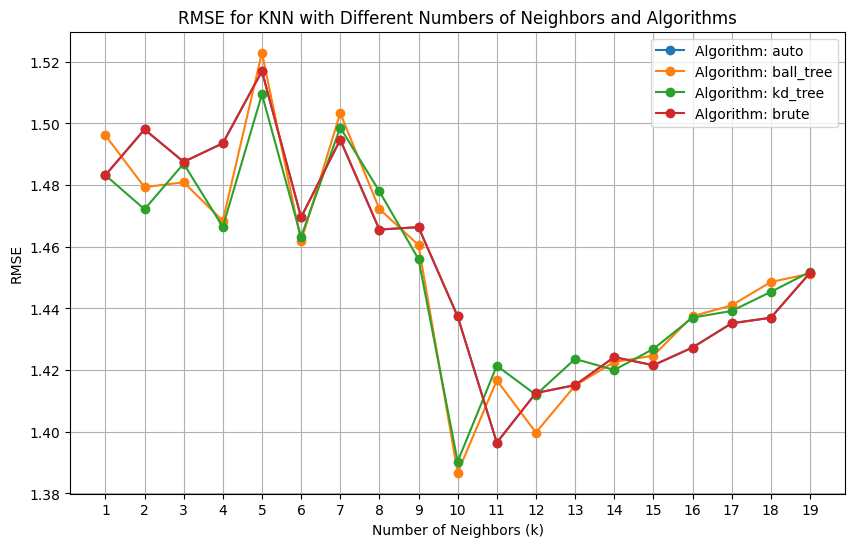

In [78]:
### Model 2. KNN 

n_neighbors = list(range(1, 20))  
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
rmse_results = {}

for algo in algorithms:
    rmse_algo = []
    for n in n_neighbors:
        knn = KNeighborsRegressor(n_neighbors=n, algorithm=algo)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
        rmse_algo.append(rmse_knn)
    rmse_results[algo] = rmse_algo

# Plot the results
plt.figure(figsize=(10, 6))
for algo, rmse in rmse_results.items():
    plt.plot(n_neighbors, rmse, marker='o', label=f'Algorithm: {algo}')

plt.title('RMSE for KNN with Different Numbers of Neighbors and Algorithms')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.xticks(n_neighbors)
plt.grid(True)
plt.legend()
plt.show()

In [88]:
knn = KNeighborsRegressor(n_neighbors=10, algorithm='ball_tree')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)

print(" Best fit KNN RMSE :", rmse_knn)

 KNN RMSE : 1.4822280526288794


Model 4: For binary Pass/Fail data : Combine PCA and Calculate Logistic regression and measure PCC  and compare against the paper's data for the same . 

### Binary classification results (PCC values, in %)
Input Mathematics 
|Setup 	|NV 			|NN 		|SVM 		|DT 		|RF 
|-------|-------		|-------	|------- 	|-------	|-------
|A 		|91.9† ±0.0 	|88.3±0.7 	|86.3±0.6 	|90.7±0.3 	|91.2±0.2
|B 		|83.8†±0.0 		|81.3±0.5 	|80.5±0.5 	|83.1±0.5 	|83.0±0.4
|C 		|67.1±0.0 		|66.3±1.0 	|70.6∗±0.4 	|65.3±0.8 	|70.5±0.5 

In [95]:
### Model 3.Logistic Regression Model ###

# Split dataset into features (X) and target (y)
X = df.drop('G3', axis=1)  # All columns except 'G3'
y = df['G3']               # 'G3' column as target

# Convert target values to binary (0 for fail, 1 for pass)
y = (y >= 10).astype(int)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Predict probabilities for PCC calculation
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]


# Calculate PCC for Logistic Regression without PCA
pcc_no_pca, _ = pearsonr(y_test, y_pred_prob)
print(f"PCC of Logistic Regression without PCA: {pcc_no_pca*100:.2f}")


### Model 4.Logistic Regression Model ###

# Step 2: Standardize the features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # n_components were trained from 1 to 10 to get the optimum value
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Logistic Regression with PCA
log_reg_pca = LogisticRegression(max_iter=500)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Predict probabilities for PCC calculation after PCA
y_pred_pca_prob = log_reg_pca.predict_proba(X_test_pca)[:, 1]



# Calculate PCC for Logistic Regression with PCA
pcc_with_pca, _ = pearsonr(y_test, y_pred_pca_prob)
print(f"PCC of Logistic Regression with PCA: {pcc_with_pca*100:.2f}")

PCC of Logistic Regression without PCA: 85.54
PCC of Logistic Regression with PCA: 77.40


## Results and Analysis 

In [96]:

print(f"Model 1 : RMSE for Linear Regression with best alpha( Ridge): {rmse_linear}")
print(f"Model 2 : RMSE for best fit KNN  :", rmse_knn)
print(f"Model 3 : PCC of Logistic Regression without PCA: {pcc_no_pca*100:.2f}")
print(f"Model 4 : PCC of Logistic Regression with PCA: {pcc_with_pca*100:.2f}")

Model 1 : RMSE for Ridge Regression with best alpha: 1.265717461325014
Model 2 : RMSE for best fit KNN  : 1.4822280526288794
Model 3 : PCC of Logistic Regression without PCA: 85.54
Model 4 : PCC of Logistic Regression with PCA: 77.40


### Discussion and Conclusion :

I have tried the above mentioned 4 models on the provided dataset from UCI Irvine to validate the results and study the effect of parameter cleanup and selection . 

Things of note that were done : 
 Converted the categorical parameters to an integer format to provide proper input and weights for supervised learning algorithm . 
 Cleaned the data . 
 Trained Linear regression models with Grid Search to find the best value of the hyperparameter alpha . 
 Trained the K Nearest neightbours algo based model with multiple algorithms and n_component values, plotted the same on a chart and selected the best one 
 Trained  a basic logistic regression model on the base data , now modified to give binary results as pass/fail . 
 Used PCA ( Principal Component Analysis) an unsupervised method to get the best combination of parameters , ran logistic regression again to get the PCC value . 
  
Acheived Results : 
Model 1 : RMSE for Ridge Regression with best alpha: 1.265717461325014
Model 2 : RMSE for best fit KNN  : 1.4822280526288794
Model 3 : PCC of Logistic Regression without PCA: 85.54
Model 4 : PCC of Logistic Regression with PCA: 77.40


Reference: 
  
### Regression results (RMSE values) ( From the research paper Table 5:## )
Mathematics 

|       |  NV        | NN         | SVM        | DT         | RF          |
|-------|------------|------------|------------|------------|-------------|
| **A** | 2.01±0.00  | 2.05±0.02  | 2.09±0.02  | 1.94±0.04  | 1.75†±0.01  |
| **B** | 2.80±0.00  | 2.82±0.02  | 2.90±0.02  | 2.67±0.04  | 2.46†±0.01  |
| **C** | 4.59±0.00  | 4.41±0.03  | 4.37±0.03  | 4.46±0.04  | 3.90†±0.01  |


### Binary classification results (PCC values, in %)( From the research paper Table 3:## )
Input Mathematics 
|Setup 	|NV 			|NN 		|SVM 		|DT 		|RF 
|-------|-------		|-------	|------- 	|-------	|-------
|A 		|91.9† ±0.0 	|88.3±0.7 	|86.3±0.6 	|90.7±0.3 	|91.2±0.2
|B 		|83.8†±0.0 		|81.3±0.5 	|80.5±0.5 	|83.1±0.5 	|83.0±0.4
|C 		|67.1±0.0 		|66.3±1.0 	|70.6∗±0.4 	|65.3±0.8 	|70.5±0.5 